In [1]:
import pandas as pd
import openpyxl as xls

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe

from sklearn.naive_bayes import GaussianNB
from sklearn.base import TransformerMixin

In [2]:
dtraining = pd.read_excel("dataTraining.xlsx")
dtraining

,author,text1,text2,classification
0,@hotibihotibi9339,cinta,NaN,1
1,@JauharAhnafFalihIzzuddin,cinta,NaN,1
2,@muhammadjalaluddin2101,terburuk,NaN,0
3,@rizkyputra8979,menang,NaN,1
4,@muhammaddahlan830,bekerja,NaN,1
...,...,...,...,...
65,@FernandoJuan-q5u,janji_mu_akan_kami_ingat,NaN,1
66,@AdytiaLubis,insyaallah_presiden,NaN,1
67,@rinawwati9825,pensiun,NaN,0
68,@dedy9756,ngak_fokus_kepada_masyarakat,NaN,0


In [3]:
X_train = dtraining.drop(columns=["author", "classification"])
y_train = dtraining.classification

In [4]:
dtesting = pd.read_excel("dataTesting.xlsx")
dtesting

,author,text1,text2,text3
0,ucup,cinta,NaN,NaN


In [5]:
preprocessor = ColumnTransformer([
    ('categoric', cat_pipe(encoder='onehot'), ['text1', 'text2']),
])

In [6]:
# Custom transformer to convert sparse matrix to dense
class ToDenseTransformer(TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X.toarray() if hasattr(X, 'toarray') else X

pipeline = Pipeline([
    ('prep', preprocessor),
    ('to_dense', ToDenseTransformer()), 
    ('algo', GaussianNB())
])

In [7]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['text1', 'text2'])])),
                ('to_dense',
                 <__main__.ToDenseTransformer object at 0x10abf4350>),
                ('algo', GaussianNB())])

In [8]:
dtraining["classificationPredict"] = pipeline.predict(dtraining)
dtraining

,author,text1,text2,classification,classificationPredict
0,@hotibihotibi9339,cinta,NaN,1,1
1,@JauharAhnafFalihIzzuddin,cinta,NaN,1,1
2,@muhammadjalaluddin2101,terburuk,NaN,0,0
3,@rizkyputra8979,menang,NaN,1,1
4,@muhammaddahlan830,bekerja,NaN,1,1
...,...,...,...,...,...
65,@FernandoJuan-q5u,janji_mu_akan_kami_ingat,NaN,1,1
66,@AdytiaLubis,insyaallah_presiden,NaN,1,1
67,@rinawwati9825,pensiun,NaN,0,0
68,@dedy9756,ngak_fokus_kepada_masyarakat,NaN,0,0


In [9]:
dtesting["classificationPredict"] = pipeline.predict(dtesting)
dtesting

,author,text1,text2,text3,classificationPredict
0,ucup,cinta,NaN,NaN,1


In [10]:
X_test = dtesting.drop(columns=["author", "classificationPredict"])
y_test = dtesting.classificationPredict

In [11]:
pipeline.score(X_train, y_train)

1.0

In [12]:
pipeline.score(X_test, y_test)

1.0

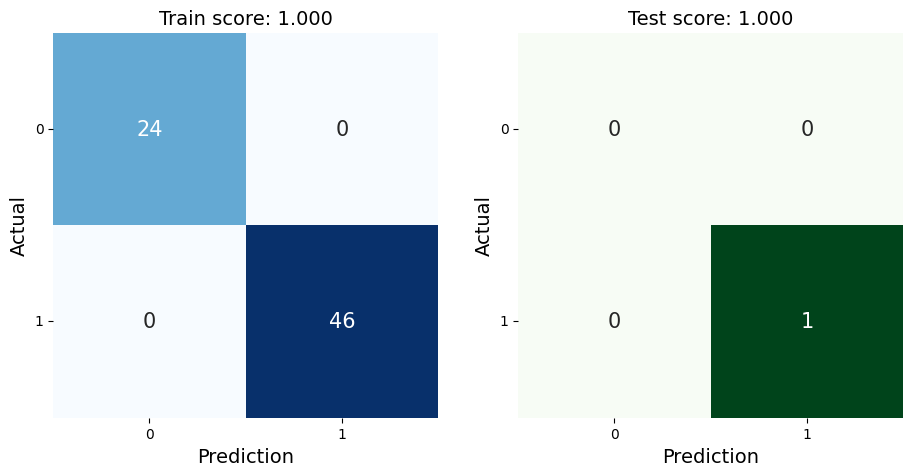

In [13]:
from jcopml.plot import plot_confusion_matrix
plot_confusion_matrix(X_train, y_train, X_test, y_test, pipeline)

In [14]:
excelfile1 = pd.ExcelWriter("KlasifikasiDataTesting.xlsx")
dtesting.to_excel(excelfile1)
excelfile1.close()

In [15]:
excelfile1 = pd.ExcelWriter("KlasifikasiDataTraining.xlsx")
dtraining.to_excel(excelfile1)
excelfile1.close()